# Exploratory Analysis

* $RQ_1$: How does temporal proximity affect sharing behaviour during protest demonstrations?
* $RQ_2$: How do source attributes like the poster's gender affect sharing behaviour during protest demonstrations?
* $RQ_3$: Is there evidence of a "backfire effect" where misleading posts that *don't* have a credibility indicator are assumed to be true and more likely to be reshared.
* $RQ_4$: Does the treatment effectiveness vary by political affiliation?

In [27]:
library(lme4)
# library(AER)
# library(dplyr)
# library(purrr)
# library(magrittr)
# library(ggplot2)
# require(ggiraph)
# require(plyr)
# require(moonBook)   # for use of data radial
# require(GGally)
# require(reshape2)
# require(compiler)
# require(parallel)
# require(boot)
# require(lattice)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-rumour-results.csv")
data$reshared <- as.integer(as.logical(data$reshared))
data$code = relevel(as.factor(data$code), ref = "neutral") 
data$evidence = relevel(as.factor(data$evidence), ref = "low") 
head(data)

,user_id,condition,timeSubmitted,secondsTaken,id,rumour,code,evidence,warning,reshared,clickedWarning,timestamp,posterGender,posterId
,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,-6.198428e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283849e+18,R1,neutral,high,False,0,False,3,male,RnJlZGVyaWNrIFdvb2RodHRwczovL3JhbmRvbXVzZXIubWUvYXBpL3BvcnRyYWl0cy90aHVtYi9tZW4vMTkuanBn
2,-6.198428e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283767e+18,R1,neutral,high,False,0,False,4,female,S2F0aWUgTXVycGh5aHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvd29tZW4vNjQuanBn
3,-6.198428e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283508e+18,R1,denies,high,True,0,False,11,male,R2FyeSBIb3BraW5zaHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvbWVuLzc4LmpwZw==
4,-6.198428e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283371e+18,R1,affirms,high,False,0,False,11,female,V2lsbGllIENsYXJraHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvd29tZW4vNy5qcGc=
5,-6.198428e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283538e+18,R1,affirms,high,False,1,False,13,female,TWVsaW5kYSBCYXJyZXR0aHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvd29tZW4vNjIuanBn
6,-6.198428e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283492e+18,R1,questions,high,False,1,False,14,male,TG9ubmllIE1pbGVzaHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvbWVuLzEwLmpwZw==


### Binomial Logistic regression

Alt add an interaction between warning and evidence (if we expect there to be different effects for putting a cred indicator on a post denying a high evidence rumour vs affirming a low evidence rumour.

* $RQ_1$: How does temporal proximity affect sharing behaviour during protest demonstrations?
* $RQ_2$: How do source attributes like the poster's gender affect sharing behaviour during protest demonstrations?

> Our outcome variable was the intent to share the article corresponding to a headline with friends on social media. Since the outcome variable is a binary choice between the intent to share or not share, we employed Binomial Logistic Regression (BLR). The BLR incorporated participant ID and headline ID as random effects to account for repeated measures for varying items [5, 68]. Our independent variables included the treat- ment, headline category, political affiliation, social media use, and common demographic factors, such as age and gender. (Yaqub)

^ I do the same but incorporating the participant ID, source ID, and post ID to account for repeated measures, and to measure the proportion of variance explained by source and post attributes

In [28]:
md <- glmer(reshared ~ posterGender + timestamp + warning + code * evidence + (1 | user_id) + (1 | posterId) + (1 | id),
            data = data,
            family = binomial, 
            control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5))
           )
summary(md)

boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: reshared ~ posterGender + timestamp + warning + code * evidence +  
    (1 | user_id) + (1 | posterId) + (1 | id)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
  3921.3   4013.9  -1946.6   3893.3     5502 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9781 -0.3896 -0.2347 -0.1228  9.7325 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 posterId (Intercept) 1.597e-13 3.997e-07
 id       (Intercept) 6.687e-01 8.178e-01
 user_id  (Intercept) 1.454e+00 1.206e+00
Number of obs: 5516, groups:  posterId, 5515; id, 167; user_id, 100

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.83471    0.31386  -5.846 5.04e-09 ***
posterGendermale            0.07710    0.08576   0.899 0.368635 

Warning message in hatvalues.merMod(model):
“the hat matrix may not make sense for GLMMs”


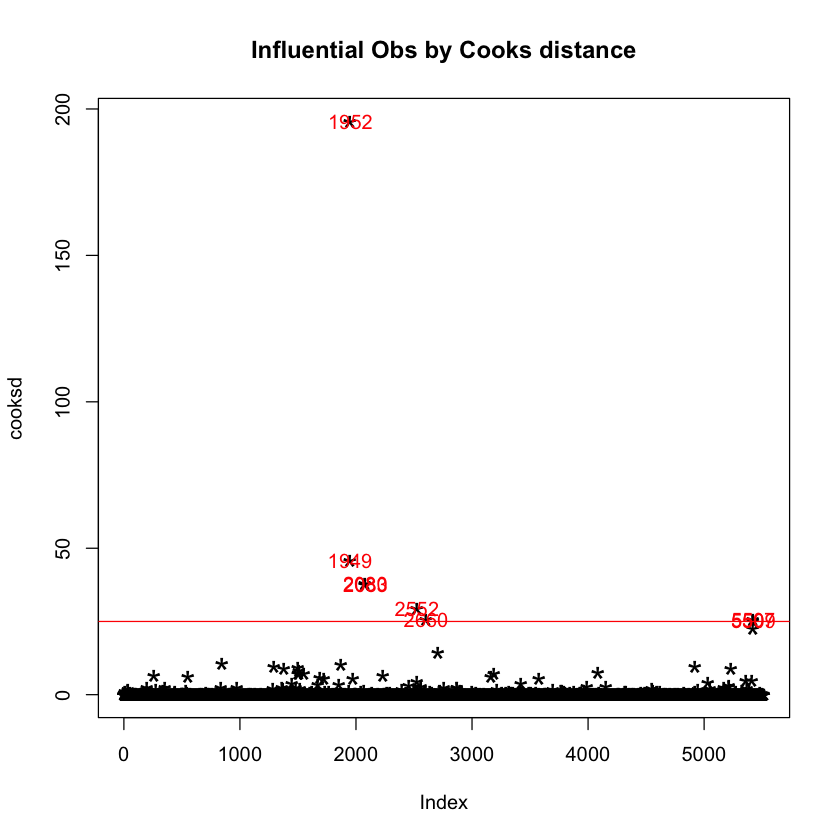

In [30]:
cooksd <- cooks.distance(md)
thresh <- 25
# Plot the Cook's Distance using the traditional 4/n criterion
sample_size <- nrow(data)
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = thresh, col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>thresh, names(cooksd),""), col="red")  # add label

In [31]:
md <- glmer(reshared ~ posterGender + timestamp + warning + code * evidence + (1 | user_id) + (1 | posterId) + (1 | id),
            data = data,
            family = binomial, 
            control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)),
            subset = cooksd<=thresh)
summary(md)

boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: reshared ~ posterGender + timestamp + warning + code * evidence +  
    (1 | user_id) + (1 | posterId) + (1 | id)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))
 Subset: cooksd <= thresh

     AIC      BIC   logLik deviance df.resid 
  3900.5   3993.1  -1936.3   3872.5     5496 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9883 -0.3880 -0.2323 -0.1182  9.7734 

Random effects:
 Groups   Name        Variance Std.Dev.
 posterId (Intercept) 0.0000   0.0000  
 id       (Intercept) 0.6852   0.8278  
 user_id  (Intercept) 1.5220   1.2337  
Number of obs: 5510, groups:  posterId, 5509; id, 167; user_id, 100

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.855468   0.317211  -5.849 4.94e-09 ***
posterGendermale            0.079039   0.086

### $RQ_4$

In [32]:
library(lme4)

reshare_rates <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
md.affirms <- lmer(sqrt(Affirms) ~ politicalAffiliation * condition * evidence + (1 | user_id), data = reshare_rates)
summary(md.affirms)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient


Correlation matrix not shown by default, as p = 23 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ politicalAffiliation * condition * evidence +  
    (1 | user_id)
   Data: reshare_rates

REML criterion at convergence: 33.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7550 -0.5828  0.0000  0.5027  1.4992 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03134  0.1770  
 Residual             0.03283  0.1812  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                                                                Estimate
(Intercept)                                                     0.316821
politicalAffiliationcentreLeft                                 -0.014239
politicalAffiliationcentreRight                                 0.115789
politicalAffiliationleft                                       -0.004392
politicalAffiliationnone                                        0.133817
politicalAffiliationright                                      -0.316821

In [4]:
coefs <- data.frame(coef(summary(md.affirms)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.affirms))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.affirms))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.316821181,0.1680916,1.88481226,"0.316821181, 0.1680916, 1.88481226",0.1680916
politicalAffiliationcentreLeft,-0.014238587,0.1770977,-0.08039962,"-0.014238587, 0.1770977, -0.08039962",0.1770977
politicalAffiliationcentreRight,0.115789151,0.2104643,0.55016053,"0.115789151, 0.2104643, 0.55016053",0.2104643
politicalAffiliationleft,-0.004392167,0.1812120,-0.02423773,"-0.004392167, 0.1812120, -0.02423773",0.1812120
politicalAffiliationnone,0.133816793,0.2104643,0.63581706,"0.133816793, 0.2104643, 0.63581706",0.2104643
politicalAffiliationright,-0.316821181,0.3040008,-1.04217217,"-0.316821181, 0.3040008, -1.04217217",0.3040008
conditionTreatment,0.192294506,0.1964282,0.97895581,"0.192294506, 0.1964282, 0.97895581",0.1964282
evidenceLow,-0.125960840,0.1691959,-0.74446761,"-0.125960840, 0.1691959, -0.74446761",0.1691959
politicalAffiliationcentreLeft:conditionTreatment,-0.288475801,0.2205753,-1.30783375,"-0.288475801, 0.2205753, -1.30783375",0.2205753


In [6]:
library(effects)
plot(allEffects(md.affirms), multiline=TRUE, ci.style="bars")

ERROR: Error in mod.matrix %*% scoef: non-conformable arguments


In [7]:
md.denies <- lmer(Denies ~ politicalAffiliation * condition * evidence + (1 | user_id), data = reshare_rates)
summary(md.denies)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 23 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ politicalAffiliation * condition * evidence + (1 | user_id)
   Data: reshare_rates

REML criterion at convergence: -50.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9374 -0.4395 -0.1413  0.3229  3.5188 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 user_id  (Intercept) 8.093e-12 2.845e-06
 Residual             3.132e-02 1.770e-01
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                                                                 Estimate
(Intercept)                                                     1.500e-01
politicalAffiliationcentreLeft                                 -8.000e-02
politicalAffiliationcentreRight                                 1.292e-11
politicalAffiliationleft                                       -1.071e-01
politicalAffiliationnone                                        2.500e-02
politicalAffiliationright                                      -1.500e-0

In [8]:
coefs <- data.frame(coef(summary(md.denies)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.denies))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.denies))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),1.500000e-01,0.1251370,1.198686e+00,"1.500000e-01, 0.1251370, 1.198686e+00",0.1251370
politicalAffiliationcentreLeft,-8.000000e-02,0.1312448,-6.095480e-01,"-8.000000e-02, 0.1312448, -6.095480e-01",0.1312448
politicalAffiliationcentreRight,1.291941e-11,0.1532609,8.429682e-11,"1.291941e-11, 0.1532609, 8.429682e-11",0.1532609
politicalAffiliationleft,-1.071429e-01,0.1337771,-8.009060e-01,"-1.071429e-01, 0.1337771, -8.009060e-01",0.1337771
politicalAffiliationnone,2.500000e-02,0.1532609,1.631205e-01,"2.500000e-02, 0.1532609, 1.631205e-01",0.1532609
politicalAffiliationright,-1.500000e-01,0.2167436,-6.920619e-01,"-1.500000e-01, 0.2167436, -6.920619e-01",0.2167436
conditionTreatment,-1.000000e-01,0.1444957,-6.920619e-01,"-1.000000e-01, 0.1444957, -6.920619e-01",0.1444957
evidenceLow,-5.000000e-02,0.1532609,-3.262411e-01,"-5.000000e-02, 0.1532609, -3.262411e-01",0.1532609
politicalAffiliationcentreLeft:conditionTreatment,1.077778e-01,0.1610118,6.693783e-01,"1.077778e-01, 0.1610118, 6.693783e-01",0.1610118


In [9]:
plot(allEffects(md.denies), multiline=TRUE, ci.style="bars")

ERROR: Error in mod.matrix %*% scoef: non-conformable arguments
